# Creating discrete Bayesian Networks

In this section, we show an example for creating a Bayesian Network in pgmpy from scratch. We use the cancer model (http://www.bnlearn.com/bnrepository/#cancer) for the example. The model structure is shown below.

In pgmpy, the model structure and it's parametrization (CPDs) doesn't depend on each other. So, the workflow is to first define the model structure, then define all the parameters (CPDs) and then add these parameters to the model. These CPDs can later on be modified, removed, replaced without changing or defining a new model structure.

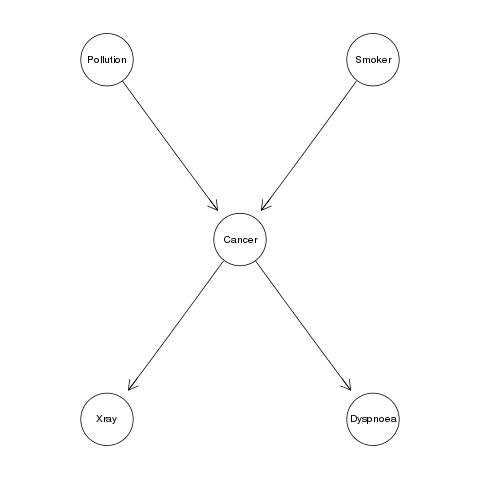

In [1]:
from IPython.display import Image

Image("images/cancer.png")

### Step 1: Define the model structure

The `BayesianModel` can be initialized by passing a list of edges in the model structure. In this case, there are 4 edges in the model: Pollution -> Cancer, Smoker -> Cancer, Cancer -> Xray, Cancer -> Dyspnoea. 

In [3]:
from pgmpy.models import BayesianNetwork

cancer_model = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

### Step 2: Define the CPDs

Each node of a Bayesian Network has a CPD associated with it, hence we need to define 5 CPDs in this case. In pgmpy, CPDs can be defined using the `TabularCPD` class. For details on the parameters, please refer to the documentation: https://pgmpy.org/_modules/pgmpy/factors/discrete/CPD.html

In [4]:
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable="Pollution", variable_card=2, values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable="Smoker", variable_card=2, values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(
    variable="Cancer",
    variable_card=2,
    values=[[0.03, 0.05, 0.001, 0.02], [0.97, 0.95, 0.999, 0.98]],
    evidence=["Smoker", "Pollution"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="Xray",
    variable_card=2,
    values=[[0.9, 0.2], [0.1, 0.8]],
    evidence=["Cancer"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="Dyspnoea",
    variable_card=2,
    values=[[0.65, 0.3], [0.35, 0.7]],
    evidence=["Cancer"],
    evidence_card=[2],
)

### Step 3: Add the CPDs to the model.

After defining the model parameters, we can now add them to the model using `add_cpds` method. The `check_model` method can also be used to verify if the CPDs are correctly defined for the model structure.

In [5]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

True

### Step 4: Run basic operations on the model

In [8]:
# Check for d-separation between variables
print(cancer_model.is_dconnected("Pollution", "Smoker"))
print(cancer_model.is_dconnected("Pollution", "Smoker", observed=["Cancer"]))

False
True


In [9]:
# Get all d-connected nodes

cancer_model.active_trail_nodes("Pollution")

{'Pollution': {'Cancer', 'Dyspnoea', 'Pollution', 'Xray'}}

In [10]:
# List local independencies for a node

cancer_model.local_independencies("Xray")

(Xray ⟂ Smoker, Pollution, Dyspnoea | Cancer)

In [11]:
# Get all model implied independence conditions

cancer_model.get_independencies()

(Xray ⟂ Smoker, Pollution, Dyspnoea | Cancer)
(Xray ⟂ Pollution, Dyspnoea | Smoker, Cancer)
(Xray ⟂ Smoker, Dyspnoea | Pollution, Cancer)
(Xray ⟂ Smoker, Pollution | Cancer, Dyspnoea)
(Xray ⟂ Dyspnoea | Smoker, Pollution, Cancer)
(Xray ⟂ Pollution | Smoker, Cancer, Dyspnoea)
(Xray ⟂ Smoker | Pollution, Cancer, Dyspnoea)
(Smoker ⟂ Pollution)
(Smoker ⟂ Xray, Dyspnoea | Cancer)
(Smoker ⟂ Xray, Dyspnoea | Pollution, Cancer)
(Smoker ⟂ Dyspnoea | Xray, Cancer)
(Smoker ⟂ Xray | Cancer, Dyspnoea)
(Smoker ⟂ Dyspnoea | Pollution, Xray, Cancer)
(Smoker ⟂ Xray | Pollution, Cancer, Dyspnoea)
(Pollution ⟂ Smoker)
(Pollution ⟂ Xray, Dyspnoea | Cancer)
(Pollution ⟂ Xray, Dyspnoea | Smoker, Cancer)
(Pollution ⟂ Dyspnoea | Xray, Cancer)
(Pollution ⟂ Xray | Cancer, Dyspnoea)
(Pollution ⟂ Dyspnoea | Smoker, Xray, Cancer)
(Pollution ⟂ Xray | Smoker, Cancer, Dyspnoea)
(Dyspnoea ⟂ Smoker, Pollution, Xray | Cancer)
(Dyspnoea ⟂ Pollution, Xray | Smoker, Cancer)
(Dyspnoea ⟂ Smoker, Xray | Pollution, Cancer)
(Dy

## Loading example models

To quickly try out different features, pgmpy also has the functionality to directly load some example models from the bnlearn repository.

In [12]:
from pgmpy.utils import get_example_model

model = get_example_model("cancer")
print("Nodes in the model:", model.nodes())
print("Edges in the model:", model.edges())
model.get_cpds()

Nodes in the model: ['Pollution', 'Smoker', 'Cancer', 'Xray', 'Dyspnoea']
Edges in the model: [('Pollution', 'Cancer'), ('Smoker', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea')]


[<TabularCPD representing P(Cancer:2 | Pollution:2, Smoker:2) at 0x7fbbbcdffee0>,
 <TabularCPD representing P(Dyspnoea:2 | Cancer:2) at 0x7fbbbcdff4f0>,
 <TabularCPD representing P(Pollution:2) at 0x7fbbbcdffa30>,
 <TabularCPD representing P(Smoker:2) at 0x7fbbbcdff7f0>,
 <TabularCPD representing P(Xray:2 | Cancer:2) at 0x7fbbbcdff790>]